<a href="https://colab.research.google.com/github/OlyMahmudMugdho/supervised-learning-notes/blob/main/kth_nearest_neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
yasserh_titanic_dataset_path = kagglehub.dataset_download('yasserh/titanic-dataset')

print('Data source import complete.')
print(yasserh_titanic_dataset_path)

Using Colab cache for faster access to the 'titanic-dataset' dataset.
Data source import complete.
/kaggle/input/titanic-dataset


In [11]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
!ls -l /kaggle/input/titanic-dataset

total 60
-rw-r--r-- 1 1000 1000 61194 Aug  6 05:50 Titanic-Dataset.csv


In [15]:

# 2. Load dataset (Kaggle Titanic dataset example)
df = pd.read_csv(yasserh_titanic_dataset_path + "/Titanic-Dataset.csv")

In [16]:
# 3. Data Preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
df = pd.get_dummies(df, drop_first=True)

/tmp/ipython-input-3025549635.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3025549635.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [17]:
# Features and Target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# 4. Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
# 5. Predictions
y_pred = knn.predict(X_test)

In [22]:
# 6. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



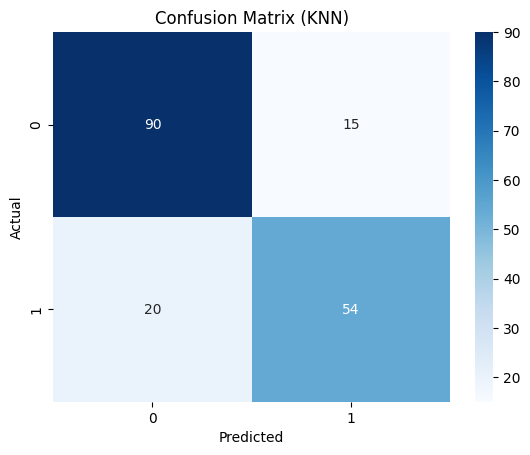

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()